### Übung 1

In der Vorlesung hatten wir gesehen, dass der Insertion-Sort Algorithmus eine Laufzeit-Komplexität von $\theta (n^2)$ aufweist. Leiten Sie dies her. Nehmen Sie dazu den schlechtesten Fall an ('worst case time complexity'). Sie können dabei annehmen, dass die Arbeit für einen Tausch (swap) und einen Vergleich (comparisson) jeweils $
**[5 points]**

Tipp: Erinnern Sie sich an die "Geschichte des schlauen Mathematikers", der die Zahlen geschickt aufaddierte:
$$ \sum_{q=1}^p = \frac{p \cdot (p+1)}{2} $$


Anmerkung: Sie können die Herleitung in der Markdown Zelle hier machen, oder auf einem Zettel und diesen einscannen.

### Zur Übung 1:
Herleitung "worst case time complexity". n × (n - 1) × ½
Wenn wir dies ausmultiplizieren, erhalten wir:
½ n² - ½ n
Auch wenn wir nur halb so viele Operationen haben wie im durchschnittlichen Fall, ändert sich an der Zeitkomplexität nichts – der Term enthält immer noch ein n², und somit gilt:
Die Zeitkomplexität von Insertion Sort beträgt im worst case: O(n²)
Quelle:https://www.happycoders.eu/de/algorithmen/insertion-sort/
Swap:
Comparission:


Chat GPT: Der Insertion-Sort-Algorithmus hat im Allgemeinen eine Laufzeitkomplexität von O(n^2). Dies bedeutet, dass die Anzahl der Schritte, die der Algorithmus ausführt, proportional zur Quadratwurzel der Größe der Eingabe ist.
Fall 1: Wenn der Algorithmus eine Swap-Operation ausführt, um die Elemente zu sortieren, dann hängt die Anzahl der Operationen direkt von der Anzahl der Elemente ab. Wenn der Algorithmus beispielsweise n Elemente sortiert, müssen im schlimmsten Fall n-1 Swaps durchgeführt werden. In der durchschnittlichen Ausführung des Algorithmus werden etwa n^2/4 Swaps durchgeführt, da jeder Schritt im Durchschnitt mit einem anderen Element verglichen wird. Daher hat der Algorithmus im schlimmsten Fall eine Laufzeitkomplexität von O(n^2) und im Durchschnitt eine Laufzeitkomplexität von O(n^2).
Fall 2: Wenn der Algorithmus nur Vergleiche durchführt, um die Elemente zu sortieren, hat jeder Schritt eine konstante Laufzeit. Im schlimmsten Fall müssen jedoch n^2/2 Vergleiche durchgeführt werden, da der Algorithmus jedes Element mit jedem anderen Element vergleichen muss. Daher hat der Algorithmus im schlimmsten Fall eine Laufzeitkomplexität von O(n^2).
In beiden Fällen hat der Insertion-Sort-Algorithmus eine Laufzeitkomplexität von O(n^2), was ihn zu einem vergleichsweise langsamen Sortieralgorithmus macht.

### Übung 2

a) Schreiben Sie eine Python implementierung eines Insertion-Sort Algoritmus.   
**[4 points]**

Hinweis: Copy-paste einer Internt-Vorlage zählt nicht.

In [1]:
def insertion_sort_algorithm(array: list) -> list:

    if(len(array) < 1):
        raise ValueError("Provided array must be 1d array of a length greater then 1.")
    for i in array:
        if(isinstance(i, int) == False):
            raise ValueError("Provided array must be 1d array of type int.")
        
    work_array = array.copy()
            
    
# aktuell noch zu sehr an Kopierter Lösung orientiert:


    for i in range(1, len(work_array)):
        swap_el = work_array[i]
        compare_el = work_array[-1]
        j = i - 1
        while j >= 0 and swap_el < work_array[j]:
            work_array[j+1] = work_array[j]
            j -= 1
        work_array[j+1] = swap_el
    return(work_array)




my_array = [4,5,6,1]
return_array = insertion_sort_algorithm(my_array)

print(f"Algorithm is correct: {my_array.sort() == return_array}")



Algorithm is correct: False


Weiter ist hier ist eine Implementierung eines Merge-Sort Algorithmus. Sie benötigen sie für Aufgabe 3.

In [2]:
def merge_sort(array):
    if len(array) > 1:
        #  r is the point where the array is divided into two subarrays
        r = len(array)//2
        L = array[:r]
        M = array[r:]

        # Sort the two halves
        merge_sort(L)
        merge_sort(M)

        i = j = k = 0

        # Until we reach either end of either L or M, pick larger among
        # elements L and M and place them in the correct position at A[p..r]
        while i < len(L) and j < len(M):
            if L[i] < M[j]:
                array[k] = L[i]
                i += 1
            else:
                array[k] = M[j]
                j += 1
            k += 1

        # When we run out of elements in either L or M,
        # pick up the remaining elements and put in A[p..r]
        while i < len(L):
            array[k] = L[i]
            i += 1
            k += 1

        while j < len(M):
            array[k] = M[j]
            j += 1
            k += 1

        
# Print the array
def print_list(array):
    for i in range(len(array)):
        print(array[i], end=" ")
    print()


# Driver program
if __name__ == '__main__':
    array = [6, 5, 12, 10, 9, 1]

    merge_sort(array)

    print("Sorted array is: ")
    print_list(array)

Sorted array is: 
1 5 6 9 10 12 


### Übung 3

a) Messen Sie die Laufzeiten für beide Algorihmen (Insertion- and Merge-Sort) aus Übung 2 für die Arrays
- list(range(100,1,-1))
- list(range(1000,1,-1))
- list(range(5000,1,-1))
- list(range(10000,1,-1))
- list(range(25000,1,-1))

**[5 points]**

Tipp: Um die Laufzeiten Ihrer Algorithmen zu bestimmen, können Sie das timeit oder das time Modul nutzen. Eine "average-Laufzeit" Bestimmung ist nicht nötig, sprich ein Durchgang genügt jeweils. Lasten Sie den PC jedoch während der Rechnungen nicht andersweitig aus (z.B. durch andere Programme), um das Ergebnis nicht zu verfälschen.

In [3]:
import timeit
times = {}

upper_list = [100, 1000, 5000, 10000, 15000]
for i in range(len(upper_list)):
    array = list(range(upper_list[i], 1, -1))

    time_merge = timeit.timeit(lambda: merge_sort(array), number=1)
    time_insortion = timeit.timeit(lambda: insertion_sort_algorithm(array), number=1)
    times[upper_list[i]] = {"merge": round(time_merge * 1000, 4), "insertion": round(time_insortion * 1000, 4)}
for key, value in times.items():
    print(f"Runtime with array of range {key}: {value} milliseconds.")



Runtime with array of range 100: {'merge': 2.7525, 'insertion': 0.086} milliseconds.
Runtime with array of range 1000: {'merge': 8.7497, 'insertion': 0.4586} milliseconds.
Runtime with array of range 5000: {'merge': 24.2717, 'insertion': 2.1862} milliseconds.
Runtime with array of range 10000: {'merge': 37.2411, 'insertion': 2.6422} milliseconds.
Runtime with array of range 15000: {'merge': 41.82, 'insertion': 3.4801} milliseconds.


In [26]:
print(times)

{100: {'merge': 2.7525, 'insertion': 0.086}, 1000: {'merge': 8.7497, 'insertion': 0.4586}, 5000: {'merge': 24.2717, 'insertion': 2.1862}, 10000: {'merge': 37.2411, 'insertion': 2.6422}, 15000: {'merge': 41.82, 'insertion': 3.4801}}


b) Plotten Sie die Ergebnisse für Laufzeiten gegen die Inputgröße aus Übung 2 für beide Algorithmen in einem Plot.   
**[4 points]**

Tipp: Sie können die Matplotlib "scatter" Methode verwenden.

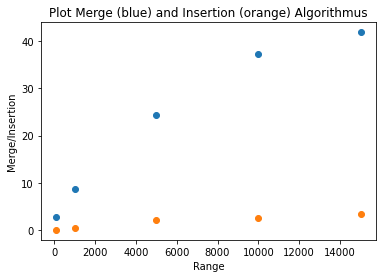

In [59]:
import matplotlib.pyplot as plt


y_values =  list(times.keys())
y_values_a = []
for key, value in times.items():
    y_values_a.append(value['merge'])
    
y_values_b = []
for key, value in times.items():
    y_values_b.append(value['insertion'])
    
plt.scatter(x_values, y_values_a)
plt.scatter(x_values, y_values_b)

plt.xlabel("Range")
plt.ylabel("Merge/Insertion")
plt.title("Plot Merge (blue) and Insertion (orange) Algorithmus")

# Zeige den Plot an
plt.show()

